In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [2]:
construction = pd.read_csv('berk_construction.csv')

In [3]:
construction.head(2)

,Name,Status,Type,Location,Description,Funding Source,Project Team,Project Team Info
0,1740 San Pablo Avenue,Design,Transportation,1740 San Pablo Avenue,Transform unutilized space at 1740 San Pablo i...,['Measure O'],"['Jenny Wyant', 'Bridge Housing']","[['Jenny Wyant', 'Senior Community Development..."
1,1947 Center Street Facility Improvements,Design,Affordable Housing,1947 Center Street,This is a Measure T1 Phase 2 project. The 1947...,['Measure T1'],"['Elmar Kapfer ', 'Ingrid Lin']","[['Elmar Kapfer ', 'Supervising ', 'Public Wor..."


In [12]:
# Counter(construction.Status) # most are completed
# --> look specifically at listed in Design, Planning, Completed
construction['Completed'] = construction.Status == 'Completed'
construction.head(1)
# 56 projects WIP, # 47 completed

,Name,Status,Type,Location,Description,Funding Source,Project Team,Project Team Info,Completed
0,1740 San Pablo Avenue,Design,Transportation,1740 San Pablo Avenue,Transform unutilized space at 1740 San Pablo i...,[Measure O],"['Jenny Wyant', 'Bridge Housing']","[['Jenny Wyant', 'Senior Community Development...",False


#### *VIZ: Are certain project types more likely to be completed (make stacked bar for recharts)*

<Axes: title={'center': 'Completed Berkeley Projects by Type'}, xlabel='Type', ylabel='count'>

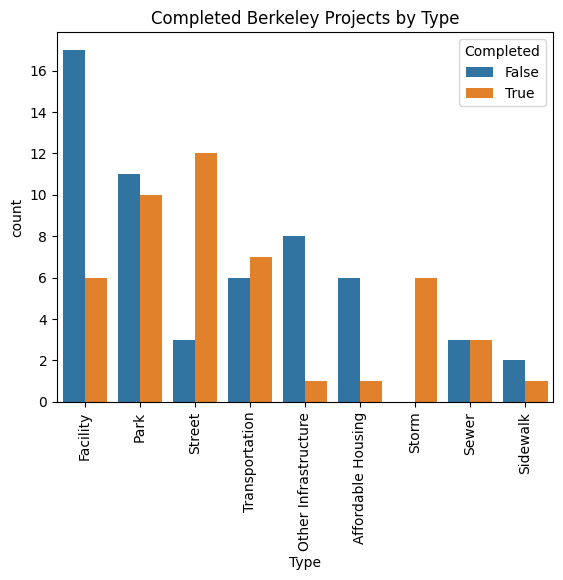

In [52]:
plt.xticks(rotation=90)
plt.title('Completed Berkeley Projects by Type')
sns.countplot(data=construction, 
              x='Type',
              hue='Completed',
              order = construction['Type'].value_counts().index)
# Takeaways: streets and storms seem to have highest completion rates...
# then park, transportation, and sewer,
# facilities , housing, and other's are last

Funding sources...

In [4]:
construction['Funding Source'] = [ast.literal_eval(a) for a in construction['Funding Source']]

In [6]:
construction.to_csv('berk_construction2.csv',index=False)

In [9]:
construction.to_json('berk_construction.json',orient='records')

In [5]:
funding_source_long = [item for sublist in construction['Funding Source'] for item in sublist]
all_funding = pd.DataFrame(columns=['funding'],data=funding_source_long)

In [76]:
len(np.unique(all_funding.funding))

33

#### *VIZ: What's the typical funding source? (Brush bar charts in recharts)*

<Axes: title={'center': 'Funding Sources in Berkeley Construction (N = 33)'}, xlabel='funding', ylabel='count'>

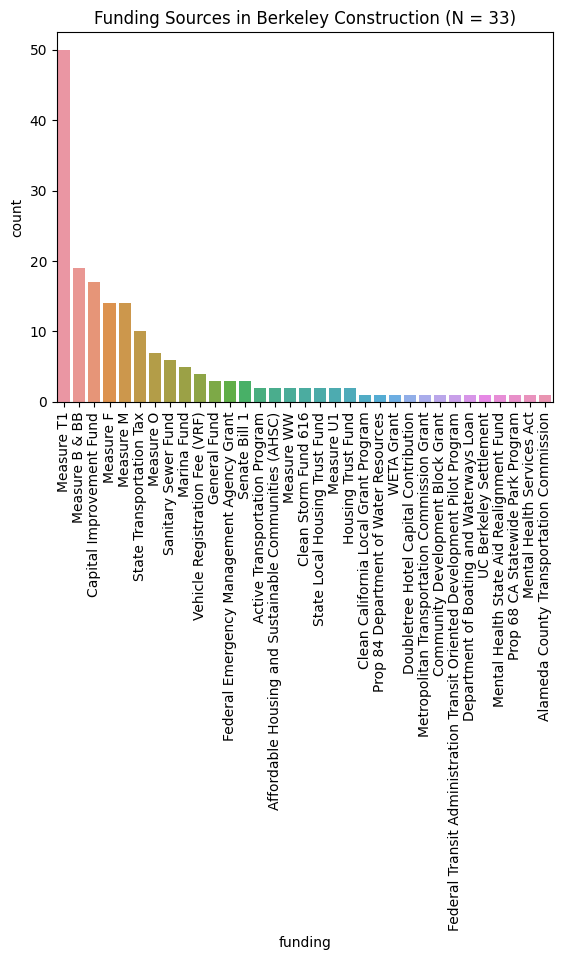

In [77]:
plt.xticks(rotation=90)
plt.title('Funding Sources in Berkeley Construction (N = 33)')
sns.countplot(data=all_funding, 
              x='funding',
            #   hue='Completed',
              order = all_funding['funding'].value_counts().index)

#### Convert data into recharts format

##### first, completed-type chart

In [13]:
construction.head(1)

,Name,Status,Type,Location,Description,Funding Source,Project Team,Project Team Info,Completed
0,1740 San Pablo Avenue,Design,Transportation,1740 San Pablo Avenue,Transform unutilized space at 1740 San Pablo i...,[Measure O],"['Jenny Wyant', 'Bridge Housing']","[['Jenny Wyant', 'Senior Community Development...",False


In [63]:
construction_completed_type = construction.groupby(['Type','Completed']).size().reset_index()
construction_completed_type = construction_completed_type.rename(columns={0:'count'})
construction_completed_type = construction_completed_type.pivot(index='Type',columns='Completed',values='count').reset_index().fillna(0)
construction_completed_type.columns.name = None
construction_completed_type

,Type,False,True
0,Affordable Housing,6.0,1.0
1,Facility,17.0,6.0
2,Other Infrastructure,8.0,1.0
3,Park,11.0,10.0
4,Sewer,3.0,3.0
5,Sidewalk,2.0,1.0
6,Storm,0.0,6.0
7,Street,3.0,12.0
8,Transportation,6.0,7.0


In [64]:
construction_completed_type.to_json('berk_construction_by_type.json',orient='records')

##### funding count chart

In [76]:
# split data by funding (some projects have >1 funding source)
construction_funding = construction.explode('Funding Source')
construction_funding = construction_funding.groupby(['Funding Source']).size().reset_index()
construction_funding = construction_funding.rename(columns={0:'count'}).sort_values('count',ascending=False)
construction_funding.head(3)

,Funding Source,count
18,Measure T1,50
14,Measure B & BB,19
3,Capital Improvement Fund,17


In [78]:
construction_funding.to_json('berk_construction_by_fund.json',orient='records')

In [26]:
constructionPermitsNew = pd.read_excel('src/data/2021_2022_PermitData.xlsx')
constructionPermits = pd.read_csv('src/data/permits2019_20.csv')

In [10]:
print(constructionPermitsNew.columns)
constructionPermits.columns

Index(['Permit.Number', 'Submittal.Date', 'Status', 'Date.Issued',
       'Finaled Status', 'Finaled Date', 'Completed', 'Completed Date', 'APN',
       'StreetNumber', 'StreetName', 'StreetType', 'Valuation',
       'Work.Description', 'ADU', 'Detached', 'Work Type', 'OccType',
       'SubType', 'NumberUnits', 'UnitsAdded', 'UnitsRemoved', 'CO Required'],
      dtype='object')


Index(['Permit.Number', 'Permit.Type', 'Status', 'Date.Issued', 'Sub.Type',
       'Property.Address', 'Valuation', 'APN', 'Contractor.s.Name',
       'Contractor.s.Address', 'Work.Description'],
      dtype='object')

In [12]:
constructionPermitsNew.head()

,Permit.Number,Submittal.Date,Status,Date.Issued,Finaled Status,Finaled Date,Completed,Completed Date,APN,StreetNumber,...,Work.Description,ADU,Detached,Work Type,OccType,SubType,NumberUnits,UnitsAdded,UnitsRemoved,CO Required
0,B2003-03513,2003-08-07,NaN,NaN,Finaled,2021-05-14,NaN,NaN,052 155600100,2240.0,...,"REMOVE (E) 2ND FLOOR SUNROOM, MOVE (E) WINDOW....",No data available,NaN,Alteration,97R3,Residential,NaN,NaN,NaN,NaN
1,B2003-04623,2003-10-15,Issued,07/26/2016,NaN,NaT,NaN,NaN,055 184500600,2670.0,...,Raise 2 story house to create garage and stora...,No data available,NaN,Addition/Alteration,97R3,Residential,NaN,NaN,NaN,NaN
2,B2007-04188,2007-09-10,NaN,NaN,Finaled,2022-11-30,NaN,NaN,058 217700708,1740.0,...,"UNITS 2 & 7 - ADD LIGHTS, SWITCHES, OUTLETS AN...",No data available,NaN,Alteration,97R3,Residential,NaN,NaN,NaN,NaN
3,B2008-05460,2008-12-12,NaN,NaN,Finaled,2021-05-03,NaN,NaN,060 242902800,1545.0,...,8/7/18 - MEP's issued for bathroom upgrades pe...,No data available,NaN,Alteration,R-2,Residential,NaN,NaN,NaN,NaN
4,B2009-03179,2009-08-25,NaN,NaN,Finaled,2022-06-08,NaN,NaN,063 297605300,977.0,...,** WUI FIRE ZONE 2 - MUST COMPLY WITH ALL REST...,No data available,NaN,Addition,R-3,Residential,NaN,NaN,NaN,NaN


In [11]:
constructionPermits.head()

,Permit.Number,Permit.Type,Status,Date.Issued,Sub.Type,Property.Address,Valuation,APN,Contractor.s.Name,Contractor.s.Address,Work.Description
0,B2017-02564,Building Permit,Issued,1/2/2019,Residential | Alteration | 4,"3031 WHEELER St,\nBERKELEY, CA 94705",50000.0,052\n158403000,POWER PLUS!,"1210 N RED GUM ST, ANAHEIM, CA, CA92806-1820",Repair and Alteration of (E) Duplex Building i...
1,B2017-04818,Building Permit,Issued,1/24/2019,Residential | Addition/Alteration\n| 6,"2850 BUENA VISTA Way, BERKELEY, CA 94708",126000.0,058\n224207508,CANIVET CONSTRUCTION INC,"828 SAN PABLO AVE STE 230, BERKELEY, CA, CA947...",66sq addition. Replace exterior doors in dinin...
2,B2018-00955,Building Permit,Issued,1/23/2019,Residential | Alteration | 4,"1510 SPRUCE St,\nBERKELEY, CA 94709",127400.0,059\n225600600,DUVAL CONSTRUCTION INC,"8642 TERRACE DR, EL CERRITO, CA, CA94530",Legalize lower unit. Abate Notice of Violation...
3,B2018-01469,Building Permit,Issued,1/18/2019,Residential | Addition | 4,"2656 VIRGINIA St,\nBERKELEY, CA 94709",119000.0,058\n220601300,NaN,NaN,Vertical Addition. Add 317 square feet to unit...
4,B2018-01711,Building Permit,Issued,1/28/2019,Residential | Alteration | 4,"2922 STANTON St C, BERKELEY, CA 94702",10000.0,053\n161900900,NaN,NaN,To obtain permit for staircase per housing rep...


In [ ]:
constructionPermits.loc[:,['Date.Issued','Sub.Type','Property.Address','Valuation','Work.Description']]
constructionPermitsNew.loc[:,['Date.Issued', 'Sub.Type', 'Work.Type','StreetNumber', 'StreetName', 'StreetType','Valuation','Work.Description']]

In [24]:
# cleaning old 2019-2020 data
constructionPermits['Sub.Type'] = constructionPermits['Sub.Type'].apply(lambda x: str(x).replace(' ','').replace('\n',''))
splitData = constructionPermits['Sub.Type'].str.split(pat='|',expand=True)
splitData
constructionPermits['Sub.Building.Type'] = splitData[0]
constructionPermits['Sub.Permit.Type'] = splitData[1]
constructionPermits.head()

,Permit.Number,Permit.Type,Status,Date.Issued,Sub.Type,Property.Address,Valuation,APN,Contractor.s.Name,Contractor.s.Address,Work.Description,Sub.Building.Type,Sub.Permit.Type
0,B2017-02564,Building Permit,Issued,1/2/2019,Residential|Alteration|4,"3031 WHEELER St,\nBERKELEY, CA 94705",50000.0,052\n158403000,POWER PLUS!,"1210 N RED GUM ST, ANAHEIM, CA, CA92806-1820",Repair and Alteration of (E) Duplex Building i...,Residential,Alteration
1,B2017-04818,Building Permit,Issued,1/24/2019,Residential|Addition/Alteration|6,"2850 BUENA VISTA Way, BERKELEY, CA 94708",126000.0,058\n224207508,CANIVET CONSTRUCTION INC,"828 SAN PABLO AVE STE 230, BERKELEY, CA, CA947...",66sq addition. Replace exterior doors in dinin...,Residential,Addition/Alteration
2,B2018-00955,Building Permit,Issued,1/23/2019,Residential|Alteration|4,"1510 SPRUCE St,\nBERKELEY, CA 94709",127400.0,059\n225600600,DUVAL CONSTRUCTION INC,"8642 TERRACE DR, EL CERRITO, CA, CA94530",Legalize lower unit. Abate Notice of Violation...,Residential,Alteration
3,B2018-01469,Building Permit,Issued,1/18/2019,Residential|Addition|4,"2656 VIRGINIA St,\nBERKELEY, CA 94709",119000.0,058\n220601300,NaN,NaN,Vertical Addition. Add 317 square feet to unit...,Residential,Addition
4,B2018-01711,Building Permit,Issued,1/28/2019,Residential|Alteration|4,"2922 STANTON St C, BERKELEY, CA 94702",10000.0,053\n161900900,NaN,NaN,To obtain permit for staircase per housing rep...,Residential,Alteration


In [19]:
constructionPermitsNew.StreetNumber.isna()

7

In [27]:
# do same thing for 2021-22 data
constructionPermitsNew = constructionPermitsNew.loc[:,['Permit.Number','Status','Date.Issued', 'SubType', 'Work Type','StreetNumber', 'StreetName', 'StreetType','Valuation','Work.Description']]
constructionPermitsNew["StreetNumber"] = constructionPermitsNew.StreetNumber.astype('Int64')
constructionPermitsNew["StreetAddress"] = constructionPermitsNew.StreetNumber.astype(str) + " " + constructionPermitsNew.StreetName + " " + constructionPermitsNew.StreetType + ", Berkeley, CA"
constructionPermitsNew

,Permit.Number,Status,Date.Issued,SubType,Work Type,StreetNumber,StreetName,StreetType,Valuation,Work.Description,StreetAddress
0,B2003-03513,NaN,NaN,Residential,Alteration,2240,PRINCE,ST,4000.0,"REMOVE (E) 2ND FLOOR SUNROOM, MOVE (E) WINDOW....","2240 PRINCE ST, Berkeley, CA"
1,B2003-04623,Issued,07/26/2016,Residential,Addition/Alteration,2670,PARKER,ST,40918.0,Raise 2 story house to create garage and stora...,"2670 PARKER ST, Berkeley, CA"
2,B2007-04188,NaN,NaN,Residential,Alteration,1740,WALNUT,ST,0.0,"UNITS 2 & 7 - ADD LIGHTS, SWITCHES, OUTLETS AN...","1740 WALNUT ST, Berkeley, CA"
3,B2008-05460,NaN,NaN,Residential,Alteration,1545,HOPKINS,ST,65000.0,8/7/18 - MEP's issued for bathroom upgrades pe...,"1545 HOPKINS ST, Berkeley, CA"
4,B2009-03179,NaN,NaN,Residential,Addition,977,REGAL,RD,200000.0,** WUI FIRE ZONE 2 - MUST COMPLY WITH ALL REST...,"977 REGAL RD, Berkeley, CA"
...,...,...,...,...,...,...,...,...,...,...,...
7740,B2022-06054,Issued,12/27/2022,Residential,Alteration,1645,VIRGINIA,St,8600.0,200A main panel upgrade,"1645 VIRGINIA St, Berkeley, CA"
7741,B2022-06056,Issued,12/27/2022,Residential,Alteration,1623,STUART,St,6000.0,REPLACE HALLWAY 50 AMP DAMAGED SUB PANEL,"1623 STUART St, Berkeley, CA"
7742,B2022-06091,Issued,12/29/2022,Residential,Alteration,1234,JOSEPHINE,St,16800.0,200amp service upgrade; Install 125amp load ce...,"1234 JOSEPHINE St, Berkeley, CA"
7743,B2022-06104,Issued,12/29/2022,Residential,Alteration,2747,ASHBY,Pl,8410.1,"1"" Gas repipe main to 4 gas appliance.\n1"" Sei...","2747 ASHBY Pl, Berkeley, CA"


In [25]:
constructionPermits.to_csv('permits2019_20_clean.csv',index=False)

In [28]:
constructionPermitsNew.to_csv('permits2020_21_clean.csv',index=False)

In [9]:
permitData = pd.DataFrame.from_records(pd.read_json('permit_data.json')['info'])
permitData.head()

,Permit Number,Date Issued,Address,Valuation,Work Description,Building Type,Construction Type,Coordinates
0,B2018-03893,1/23/2019,"1461 CURTIS St, BERKELEY, CA 94702",88500.0,Construct new 392 SF ADU,Residential,New,"[37.8773261, -122.2910914086]"
1,B2018-03969,1/14/2019,"800 DWIGHT Way, BERKELEY, CA 94710",2900000.0,1/29/19 - Electrical permit issued for lightin...,Commercial,New,"[37.8598058687, -122.2956893939]"
2,B2018-03969,1/14/2019,"800 DWIGHT Way, BERKELEY, CA 94710",2900000.0,1/29/19 - Electrical permit issued for lightin...,Commercial,New,"[37.8598058687, -122.2956893939]"
3,B2017-02076,1/14/2019,"1310 UNIVERSITY Ave, BERKELEY, CA 94702",32000.0,New 946 square foot canopy over existing secon...,Commercial,New,"[37.8693555, -122.2862556665]"
4,B2018-04041,1/30/2019,"2132 CURTIS St, BERKELEY, CA 94702",112000.0,Add 300 s.f. ADU,Residential,New,"[37.86727805, -122.2894114472]"


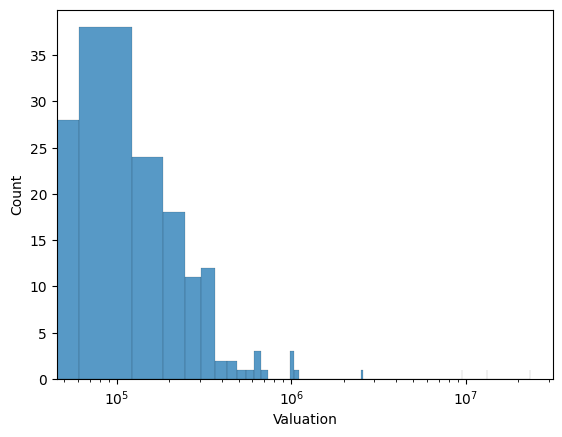

In [14]:
residential = permitData.loc[permitData['Building Type'] == 'Residential', :]
g = sns.histplot(data = residential, x = 'Valuation')
g.set_xscale("log")

In [3]:
# check residential, commercial, mixed use numbers for updated (2019-22) data
data = pd.read_json('permit_data_unique.json')
data.head()

,Permit Number,Date Issued,Address,Valuation,Work Description,Building Type,Construction Type,Coordinates,Status
0,B2018-03893,1/23/2019,"1461 CURTIS ST, BERKELEY, CA",88500.0,Construct new 392 SF ADU,Residential,New,"[37.8773261, -122.2910914086]",None
1,B2018-03969,1/14/2019,"800 DWIGHT WAY, BERKELEY, CA",2900000.0,1/29/19 - Electrical permit issued for lightin...,Commercial,New,"[37.8598058687, -122.2956893939]",None
2,B2017-02076,1/14/2019,"1310 UNIVERSITY AVE, BERKELEY, CA",32000.0,New 946 square foot canopy over existing secon...,Commercial,New,"[37.8693555, -122.2862556665]",None
3,B2018-04041,1/30/2019,"2132 CURTIS ST, BERKELEY, CA",112000.0,Add 300 s.f. ADU,Residential,New,"[37.86727805, -122.2894114472]",None
4,B2018-04296,1/3/2019,"800 DWIGHT WAY B60, BERKELEY, CA",40000.0,Seismic anchoring of a cooling tower and a fil...,Commercial,New,"[37.8597175131, -122.2956661035]",None


In [5]:
data['Building Type'].value_counts()

Residential           341
Mixed Use              20
Commercial             14
Affordable Housing      4
Name: Building Type, dtype: int64